In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ami_df = pd.read_csv('./auc_result_EUCASTv11_AMI.csv')
ami_df['drug'] = 'ami'
azt_df = pd.read_csv('./auc_result_EUCASTv11_AZT.csv')
azt_df['drug'] = 'azt'
cip_df = pd.read_csv('./auc_result_EUCASTv11_CIP.csv')
cip_df['drug'] = 'cip'
col_df = pd.read_csv('./auc_result_EUCASTv11_COL.csv')
col_df['drug'] = 'col'
cza_df = pd.read_csv('./auc_result_EUCASTv11_CZA.csv')
cza_df['drug'] = 'cza'
imi_df = pd.read_csv('./auc_result_EUCASTv11_IMI.csv')
imi_df['drug'] = 'imi'
mer_df = pd.read_csv('./auc_result_EUCASTv11_MER.csv')
mer_df['drug'] = 'mer'
ptz_df = pd.read_csv('./auc_result_EUCASTv11_PTZ.csv')
ptz_df['drug'] = 'ptz'
taz_df = pd.read_csv('./auc_result_EUCASTv11_TAZ.csv')
taz_df['drug'] = 'taz'
tic_df = pd.read_csv('./auc_result_EUCASTv11_TIC.csv')
tic_df['drug'] = 'tic'
tob_df = pd.read_csv('./auc_result_EUCASTv11_TOB.csv')
tob_df['drug'] = 'tob'
toltz_df = pd.read_csv('./auc_result_EUCASTv11_TOLTZ.csv')
toltz_df['drug'] = 'toltz'

combined_df = pd.concat([ami_df, azt_df, cip_df, col_df, cza_df, imi_df, mer_df, ptz_df, taz_df, tic_df, tob_df, toltz_df], axis=0)


combined_df



,y_true,WDNN,fWDNN,RF,LR,SVM,lightGBM,drug
0,0.0,0.004871,0.020349,0.100,0.023270,0.204253,0.014377,ami
1,0.0,0.000561,0.004525,0.035,0.003938,0.095321,0.009365,ami
2,0.0,0.091534,0.749193,0.330,0.297916,0.368045,0.002485,ami
3,0.0,0.356212,0.998244,0.540,0.058908,0.183324,0.121680,ami
4,0.0,0.003786,0.002087,0.000,0.115363,0.289448,0.005610,ami
...,...,...,...,...,...,...,...,...
84,0.0,0.012259,0.045248,0.130,0.034206,0.063193,0.010444,toltz
85,0.0,0.747079,0.995038,0.380,0.363077,0.322076,0.005450,toltz
86,1.0,0.697984,1.000000,0.690,0.900650,0.506933,0.931826,toltz
87,0.0,0.029834,0.137099,0.150,0.027399,0.139703,0.043407,toltz


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss


drugs = list(combined_df['drug'].unique())
models = ['WDNN', 'fWDNN', 'RF', 'LR', 'SVM', 'lightGBM']


# tob_df = combined_df[combined_df['drug'] == 'tob']

# accuracy_score(tob_df['y_true'], tob_df['WDNN'].round())



for drug in drugs:
    performance_results = {}
    performance_results['metric'] = ['accuracy', 'auc', 'log_loss']

    tmp_df = combined_df[combined_df['drug'] == drug]

    for model in models:
        tmp_performances = []
        tmp_acc = accuracy_score(tmp_df['y_true'], (tmp_df[model] > 0.5))
        tmp_performances.append(tmp_acc)
        
        tmp_auc = roc_auc_score(tmp_df['y_true'], tmp_df[model])
        tmp_performances.append(tmp_auc)

        tmp_log_loss = log_loss(tmp_df['y_true'], tmp_df[model])
        tmp_performances.append(tmp_log_loss)
    
        performance_results[model] = tmp_performances

    performance_df = pd.DataFrame(performance_results)
    performance_df.to_csv(f"performance_{drug}.csv", index=False)


In [14]:
drugs

['ami',
 'azt',
 'cip',
 'col',
 'cza',
 'imi',
 'mer',
 'ptz',
 'taz',
 'tic',
 'tob',
 'toltz']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

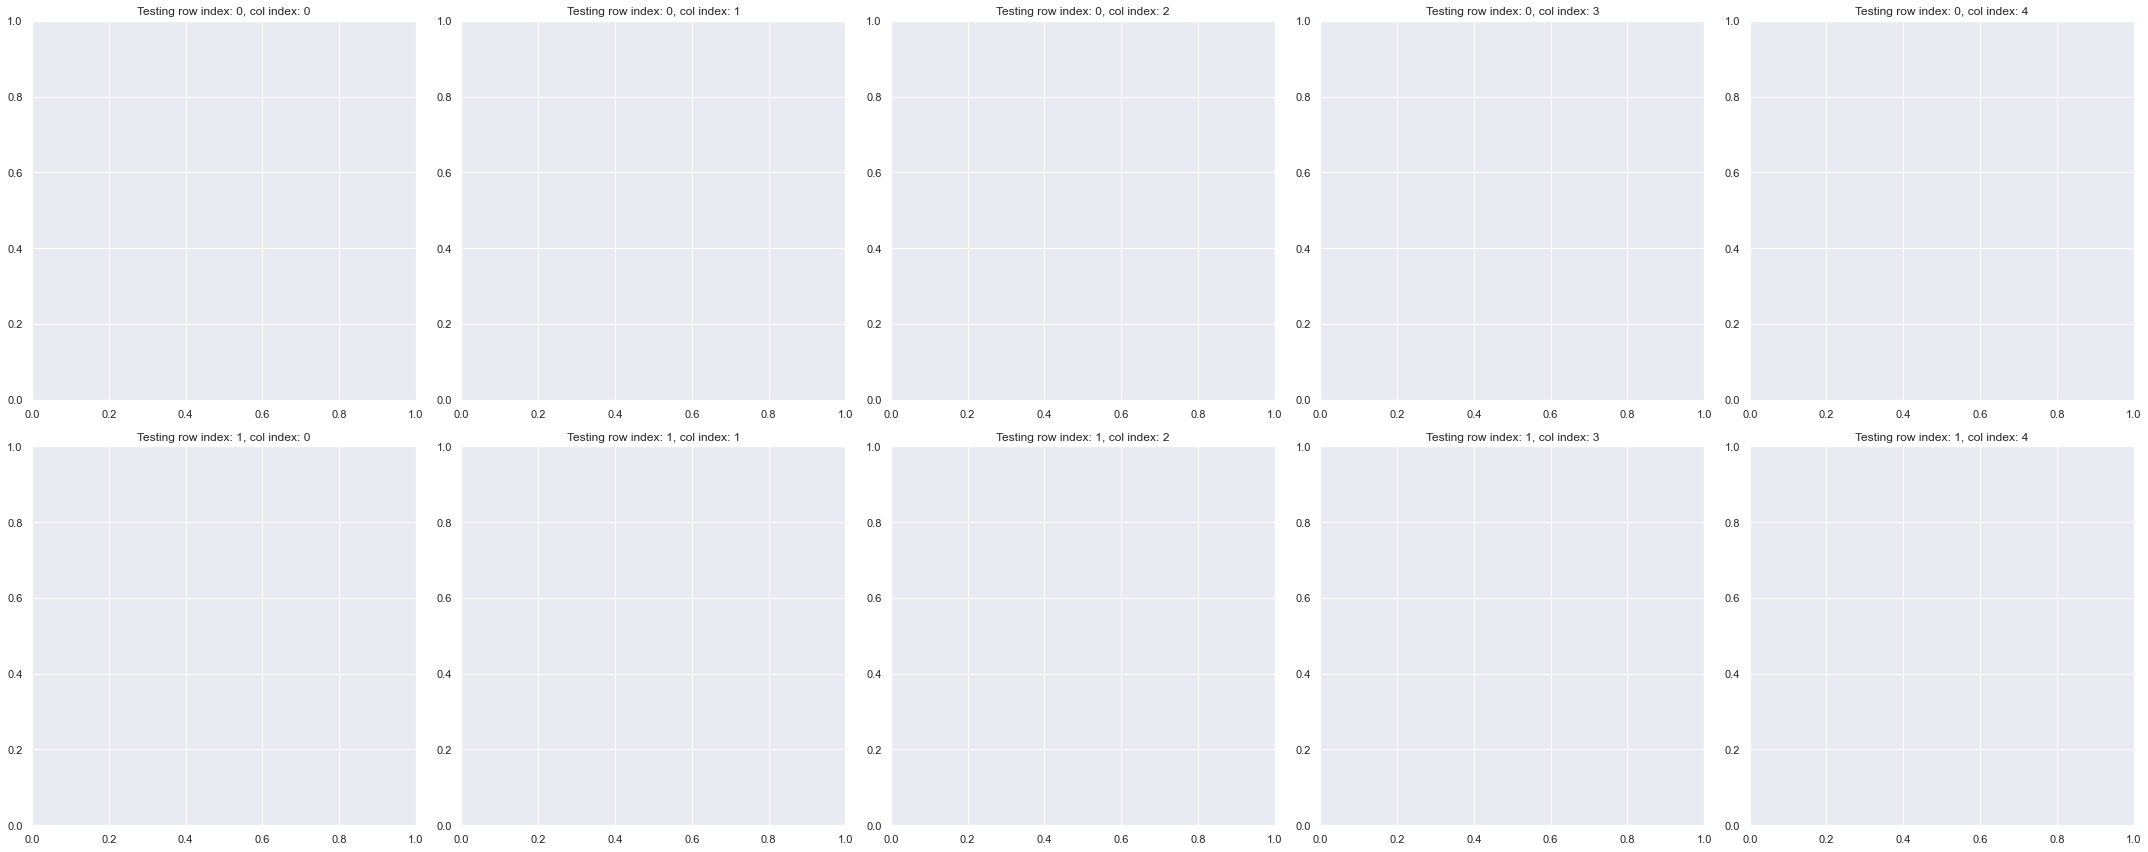

In [31]:
fig = plt.figure(figsize=(30,12))
fig.subplots_adjust(left=0.2, wspace=0.6)

for row_index in range(2):
    for col_index in range(5):
        tmp_ax = plt.subplot2grid((2,5), (row_index, col_index))
        tmp_ax.set_title(f"Testing row index: {row_index}, col index: {col_index}")

plt.tight_layout()

plt.show()

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    random_state=1234)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [21]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.01818181818181818, 0.0181818...","[0.0, 0.011363636363636364, 0.7840909090909091...",0.984091
GaussianNB,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.32954545454545453, 0.3522727272727273,...",0.982851
KNeighborsClassifier,"[0.0, 0.05454545454545454, 0.07272727272727272...","[0.0, 0.8409090909090909, 0.9318181818181818, ...",0.957438
DecisionTreeClassifier,"[0.0, 0.07272727272727272, 1.0]","[0.0, 0.9431818181818182, 1.0]",0.935227
RandomForestClassifier,"[0.0, 0.0, 0.01818181818181818, 0.018181818181...","[0.0, 0.4659090909090909, 0.6590909090909091, ...",0.983368


In [22]:
test_df = pd.read_csv('results/auc_result_EUCASTv11_MER.csv')

test_df

,y_true,WDNN,fWDNN,RF,LR,SVM,lightGBM
0,0.0,0.995985,0.962371,0.69,0.973955,0.722205,0.230337
1,0.0,0.973785,0.989344,0.58,0.176621,0.450638,0.529902
2,0.0,0.966919,0.520421,0.45,0.573452,0.518402,0.718334
3,1.0,0.999953,0.999744,0.98,0.995772,0.721122,0.997900
4,0.0,0.999696,0.991334,0.68,0.950890,0.713932,0.371455
...,...,...,...,...,...,...,...
244,1.0,0.999738,0.082828,0.47,0.406673,0.500000,0.314210
245,0.0,0.963250,0.013139,0.24,0.348000,0.508884,0.509125
246,1.0,0.999995,0.999518,0.89,0.997700,0.796111,0.973424
247,0.0,0.996778,0.891177,0.60,0.934029,0.784932,0.460517


In [23]:
test_df['WDNN_pred'] = (test_df['WDNN'] > 0.5).astype('int')

In [25]:
test_df[test_df['WDNN_pred'] == 0]

,y_true,WDNN,fWDNN,RF,LR,SVM,lightGBM,WDNN_pred
8,1.0,0.028562,0.993529,0.84,0.864717,0.709026,0.819388,0
22,1.0,0.137198,0.000386,0.17,0.065919,0.548340,0.078989,0
23,0.0,0.082149,0.000535,0.30,0.022341,0.405494,0.181009,0
26,0.0,0.460449,0.001413,0.29,0.001085,0.262460,0.007321,0
43,0.0,0.097799,0.002381,0.26,0.005402,0.280973,0.124124,0
54,1.0,0.026386,0.000128,0.31,0.003209,0.388645,0.067014,0
57,0.0,0.102485,0.000250,0.23,0.002667,0.294645,0.120867,0
65,1.0,0.091594,0.990498,0.85,0.926879,0.700930,0.882492,0
67,0.0,0.260517,0.553535,0.47,0.185469,0.479800,0.390829,0
100,0.0,0.022297,0.000097,0.31,0.004582,0.439160,0.032531,0


In [28]:
a_list = [3, 5, 6, 7]
np.array(a_list) > 4

array([False,  True,  True,  True])

In [40]:
drugs = {}

drugs['EUCASTv11_AMI'] = 'amikacin'
drugs['EUCASTv11_TOB'] = 'tobramycin'
drugs['EUCASTv11_CIP'] = 'ciprofloxacin'
drugs['EUCASTv11_COL'] = 'colistin'
drugs['EUCASTv11_AZT'] = 'aztreonam'
# drugs['EUCASTv11_IMI'] = ['imipenem']
drugs['EUCASTv11_MER'] = 'meropenem'
drugs['EUCASTv11_TAZ'] = 'ceftazidime'
drugs['EUCASTv11_CZA'] = 'cetazidime/avibactam'
# drugs['EUCASTv11_TIC'] = ['ticarcillin']
drugs['EUCASTv11_P_TZ'] = 'piperacillin/tazobactam'
drugs['EUCASTv11_TOL_TZ'] = 'ceftolozane/tazobactam'

list(drugs.keys())

['EUCASTv11_AMI',
 'EUCASTv11_TOB',
 'EUCASTv11_CIP',
 'EUCASTv11_COL',
 'EUCASTv11_AZT',
 'EUCASTv11_MER',
 'EUCASTv11_TAZ',
 'EUCASTv11_CZA',
 'EUCASTv11_P_TZ',
 'EUCASTv11_TOL_TZ']

In [46]:
importance_feature_df = pd.DataFrame()

for label in drugs.keys():
    tmp_df = pd.read_csv(f'lightgbm_important_features_{label}.csv', usecols=['value', 'feature'])
    tmp_df['antimicrobial_agent'] = drugs[label]
    importance_feature_df = pd.concat([importance_feature_df, tmp_df], axis=0)

# importance_feature_df[importance_feature_df['antimicrobial_agent'] == 'ciprofloxacin']

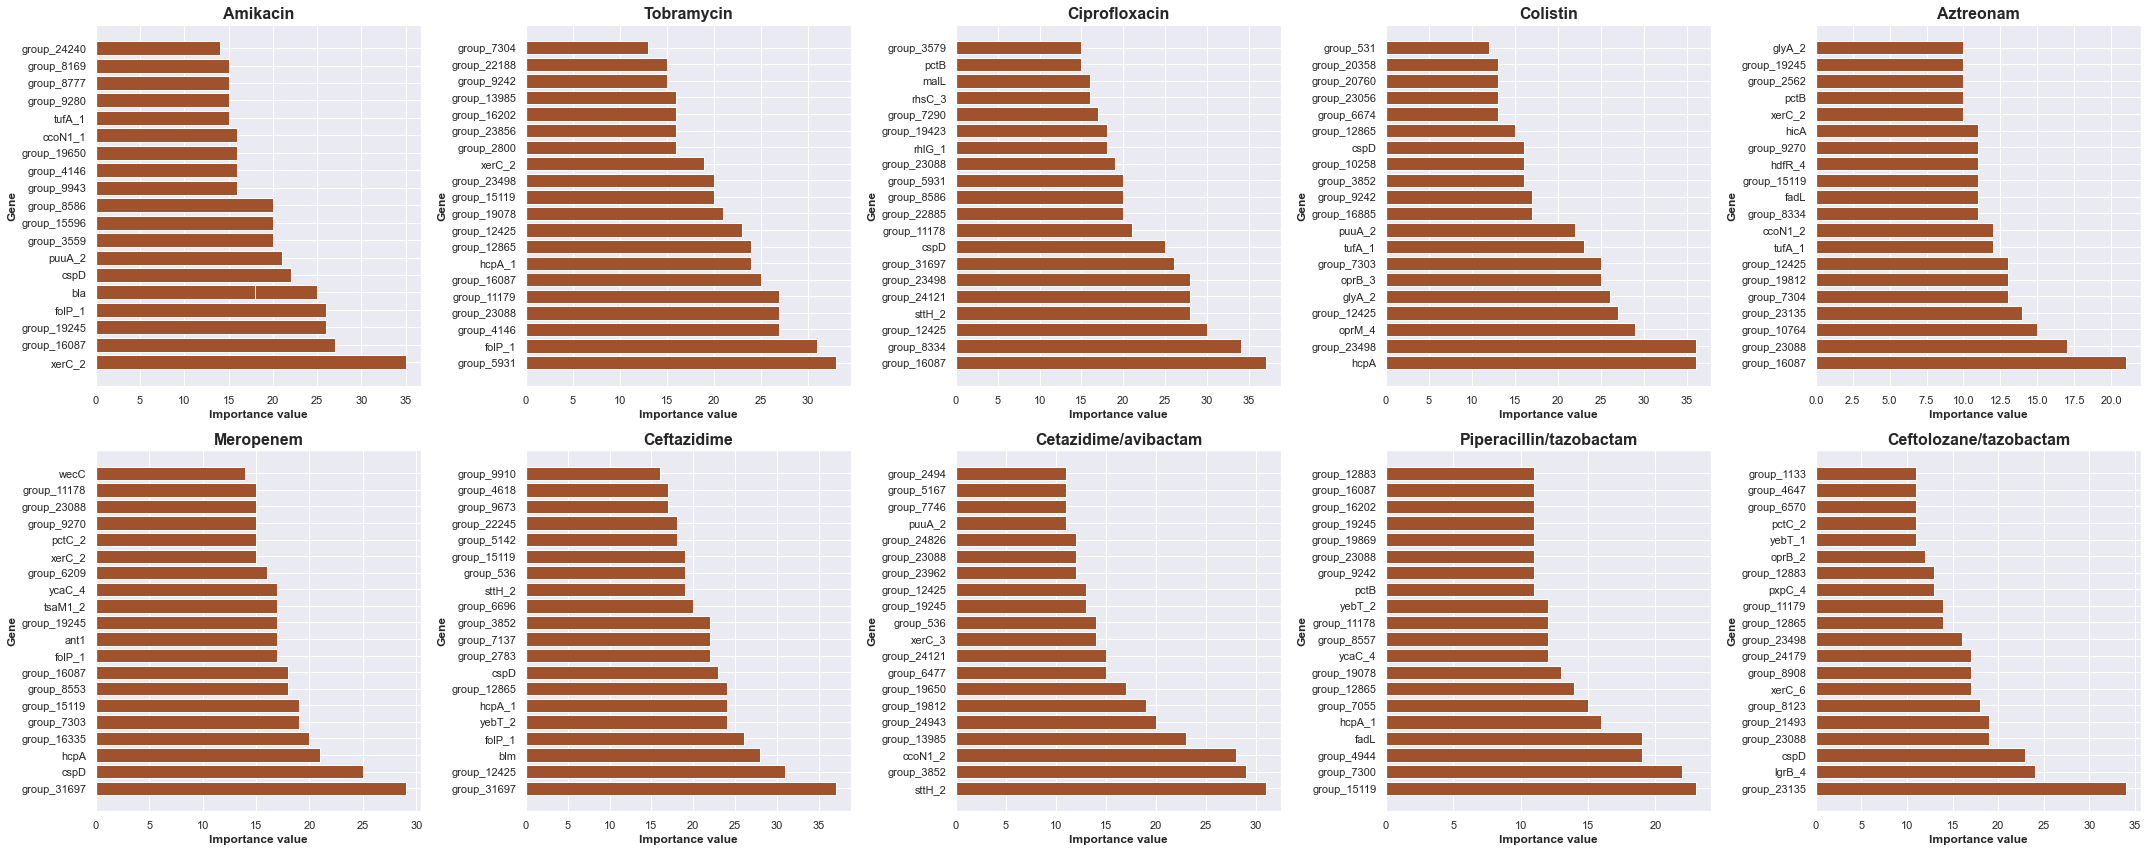

In [94]:
# Plotting feature importance results

fig = plt.figure(figsize=(30,12))
fig.subplots_adjust(left=0.2, wspace=0.6)

ncol=5
nrow=2

counter = 0
for row_index in range(nrow):
    for col_index in range(ncol):
        agent = list(drugs.values())[counter]
        counter +=1
        tmp_ax = plt.subplot2grid((nrow, ncol), (row_index, col_index))
        tmp_ax.set_title(f"{agent.capitalize()}", fontsize=16, fontweight='bold')
        tmp_ax.set_xlabel('Importance value', fontweight='bold')
        tmp_ax.set_ylabel('Gene', fontweight='bold')
        
        tmp_df = importance_feature_df[importance_feature_df['antimicrobial_agent'] == agent]
        plt.barh(tmp_df['feature'][:20], tmp_df['value'][:20], color='sienna')

        

plt.tight_layout()
# plt.show()

plt.savefig('feature.jpg', dpi=300)


# for agent in drugs.values():
#     tmp_df = importance_feature_df[importance_feature_df['antimicrobial_agent'] == agent]

    
    

#     plt.figure(figsize=(10,12))
#     plt.barh(tmp_df['feature'], tmp_df['value'])


In [153]:
# Prepare data for auc plot

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import cohen_kappa_score

performance_result_df = pd.DataFrame()

for label in drugs.keys():
    tmp_df = pd.read_csv(f'auc_result_{label}.csv')

    
    classifiers = ['WDNN', 'fWDNN', 'RF', 'LR', 'SVM', 'lightGBM']
    
    for classifier in classifiers:
        performance_dict = {}
        performance_dict['antimicrobial_agent'] = [drugs[label]]
        performance_dict['classifier'] = [classifier]
        performance_dict['accuracy'] = [np.round(accuracy_score(tmp_df['y_true'], tmp_df[f"{classifier}_pred"]), 3)]
        performance_dict['f1_score'] = [np.round(f1_score(tmp_df['y_true'], tmp_df[f"{classifier}_pred"]), 3)]
        fpr, tpr, _ = roc_curve(tmp_df['y_true'], tmp_df[f"{classifier}_prob"])
        performance_dict['fpr'] = [fpr]
        performance_dict['tpr'] = [tpr]        
        performance_dict['roc_auc'] = [np.round(roc_auc_score(tmp_df['y_true'], tmp_df[f"{classifier}_prob"]), 3)]
        performance_dict['cohen_kappa'] = [np.round(cohen_kappa_score(tmp_df['y_true'], tmp_df[f"{classifier}_pred"]), 3)]
        tmp_performance_df = pd.DataFrame(performance_dict)
        performance_result_df = pd.concat([performance_result_df, tmp_performance_df], axis=0)

    
performance_result_df.reset_index(drop=True, inplace=True)

performance_result_df.head()



,antimicrobial_agent,classifier,accuracy,f1_score,fpr,tpr,roc_auc,cohen_kappa
0,amikacin,WDNN,0.795,0.696,"[0.0, 0.0, 0.0, 0.008, 0.008, 0.024, 0.024, 0....","[0.0, 0.024390243902439025, 0.2439024390243902...",0.923,0.558
1,amikacin,fWDNN,0.843,0.698,"[0.0, 0.0, 0.0, 0.008, 0.008, 0.016, 0.016, 0....","[0.0, 0.07317073170731707, 0.1951219512195122,...",0.878,0.592
2,amikacin,RF,0.861,0.667,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008, 0.008, 0...","[0.0, 0.024390243902439025, 0.0731707317073170...",0.893,0.583
3,amikacin,LR,0.861,0.685,"[0.0, 0.0, 0.0, 0.008, 0.008, 0.016, 0.016, 0....","[0.0, 0.024390243902439025, 0.1219512195121951...",0.917,0.598
4,amikacin,SVM,0.849,0.667,"[0.0, 0.0, 0.0, 0.008, 0.008, 0.016, 0.016, 0....","[0.0, 0.024390243902439025, 0.0975609756097561...",0.886,0.570


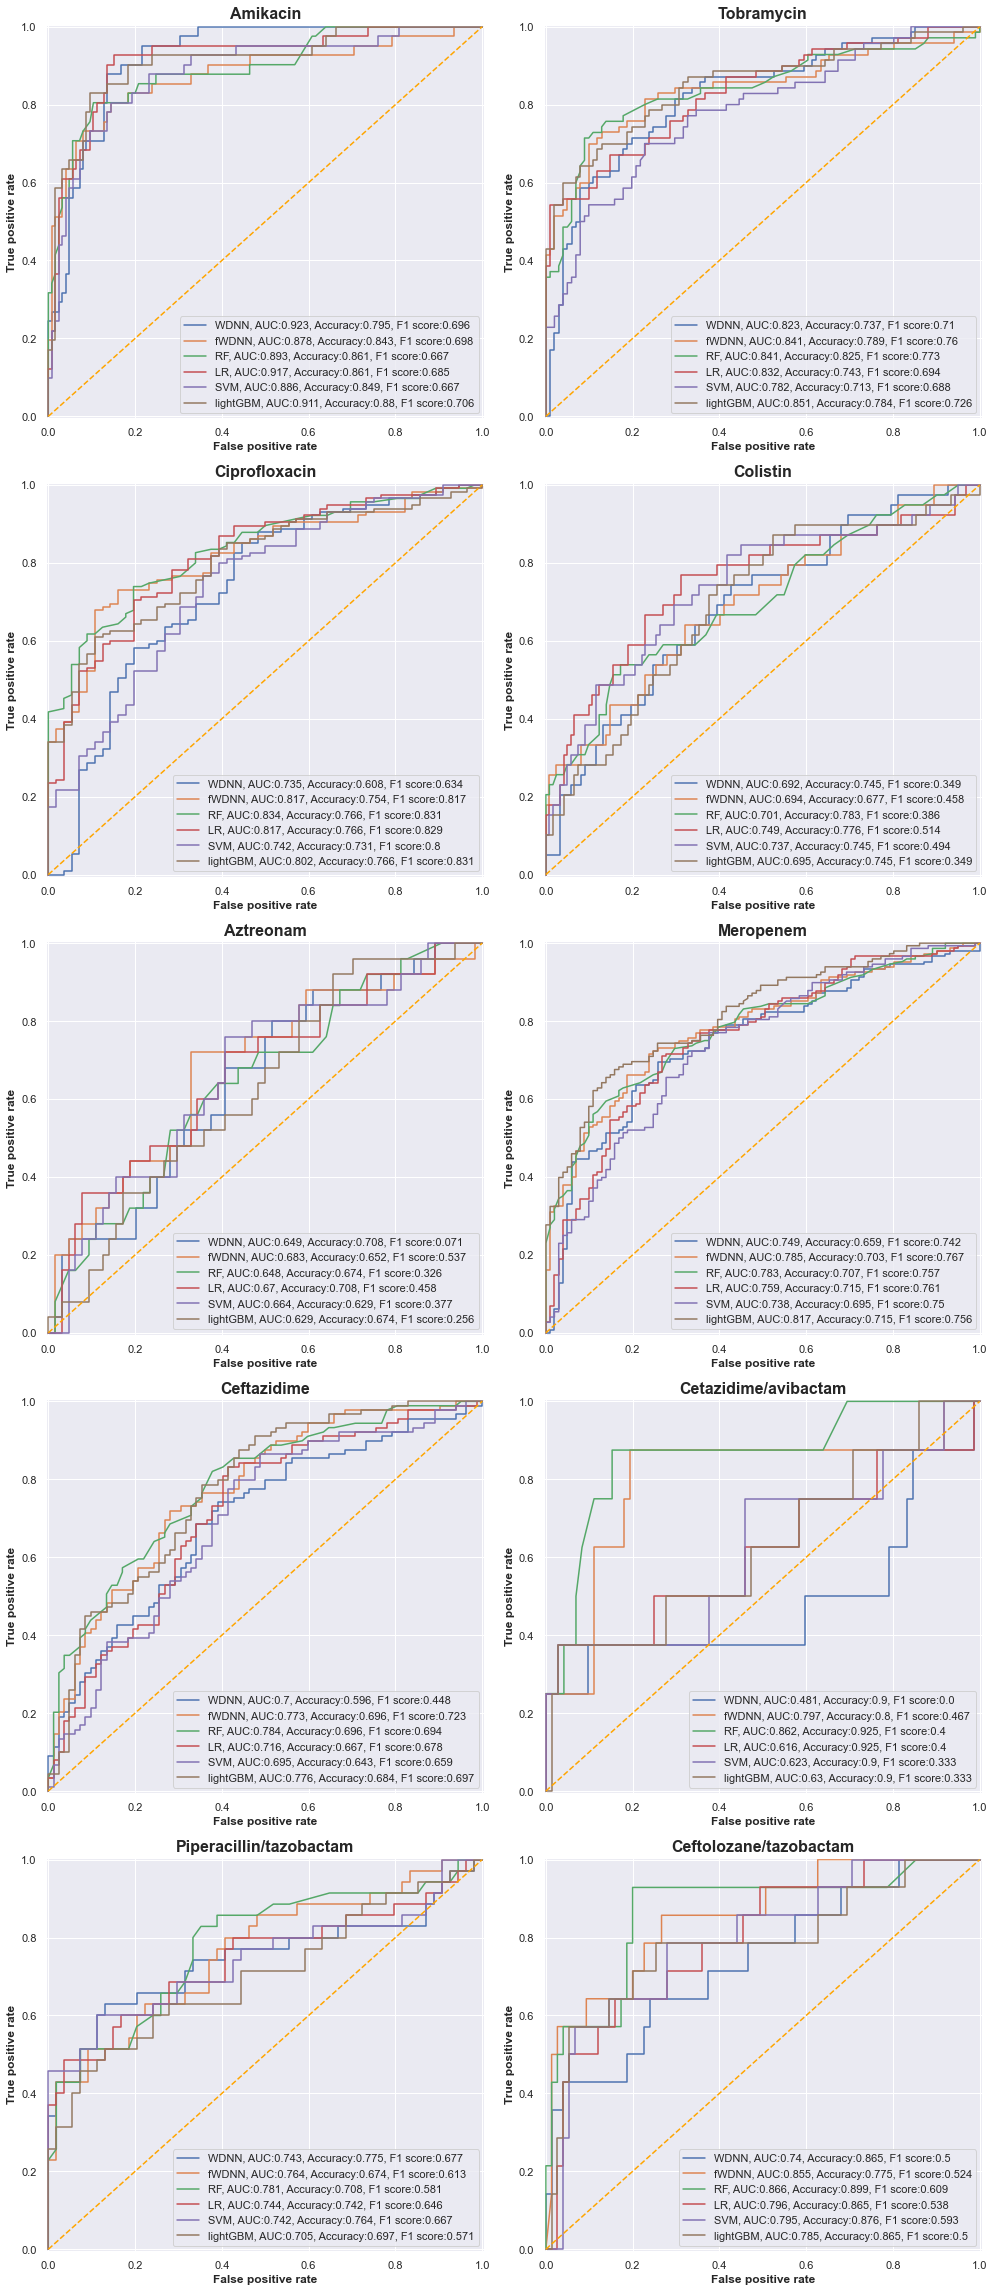

In [161]:
# Plotting ROC curves
fig = plt.figure(figsize=(14, 32))
fig.subplots_adjust(left=0.2, wspace=0.6)

ncol=2
nrow=5

counter = 0

for row_index in range(nrow):
    for col_index in range(ncol):
        agent = list(drugs.values())[counter]
        counter +=1
        tmp_ax = plt.subplot2grid((nrow, ncol), (row_index, col_index))
        tmp_ax.set_title(f"{agent.capitalize()}", fontsize=16, fontweight='bold')
        tmp_ax.set_xlabel('False positive rate', fontweight='bold')
        tmp_ax.set_ylabel('True positive rate', fontweight='bold')
        tmp_ax.set_xlim(left=-0.005, right=1.005)
        tmp_ax.set_ylim(bottom=-0.005, top=1.005)

        tmp_df = performance_result_df[performance_result_df['antimicrobial_agent'] == agent].set_index('classifier')
        
        for i in tmp_df.index:
            plt.plot(tmp_df.loc[i]['fpr'],
                     tmp_df.loc[i]['tpr'],
                     label=f"{i}, AUC:{tmp_df.loc[i]['roc_auc']}, Accuracy:{tmp_df.loc[i]['accuracy']}, F1 score:{tmp_df.loc[i]['f1_score']}")

        plt.plot([0,1], [0,1], color='orange', linestyle='--')
        plt.legend(loc='lower right', fontsize=11)
        
        
        # plt.barh(tmp_df['feature'][:20], tmp_df['value'][:20], color='sienna')

        

plt.tight_layout()
plt.savefig('performance_results.jpg', dpi=300)
plt.show()